## Work distributions for a harmonic oscillator in the canonical ensemble

### Hoover-Holian

\begin{eqnarray}
\dot{q} &=& p \\
\dot{p} &=& - \left(1 + \frac{t}{t_s} \right)^2 q - {\zeta p} - \beta \xi p^3 \\
\dot{\zeta} &=& \frac{\beta p^2 - 1}{\tau^2} \\
\dot{\xi} &=& \frac{\beta^2 p^4 - 3 \beta p^2}{\tau^2} \\
\dot{\nu} &=& \zeta + 3\beta \xi p^2
\end{eqnarray}


$$ H = \frac{p^2}{2} + \omega_{\lambda}^2 \frac{x^2}{2} $$
con 
$$ \omega_{\lambda} = 1 + \lambda \qquad \lambda(t) = \frac{t}{t_s} $$

In [1]:
using DifferentialEquations
import Distributions.Normal
import Distributions.Logistic

In [2]:
using PyPlot

In [3]:
const b = 1.0/1.5;
const QNH = 1.0;
const tauHH = 1.0;
const QLog = 1.0;
Ns = 10^6;

In [4]:
function HooverHolian(t, u, du; tau=tauHH, ts=1., beta = b) 
    du[1] = u[2]
    du[2] = -(1+t/ts)^2*u[1] - u[3]*u[2] - beta*u[4]*u[2]^3
    #du[2] = -(1)^2*u[1] - u[3]*u[2] - beta*u[4]*u[2]^3   ##Isothermal dynamics (omega = 1)
    du[3] = (beta*u[2]^2 - 1)/tau^2 
    du[4] = (beta^2*u[2]^4 - 3*beta*u[2]^2)/tau^2
    du[5] = u[3] + 3*beta*u[4]*u[2]^2
end 

HooverHolian (generic function with 1 method)

In [5]:
function workHH()
    q0,p0 = rand(Normal(0.0, 1./sqrt(b)),2)
    zeta0, xi0 = rand(Normal(0.0, 1./tauHH),2)
    nu0 = 0.0
    u0HH = [q0,p0,zeta0,xi0, nu0]
    I0 = q0^2/2. + p0^2./2. + tauHH^2.*zeta0^2./(2*b) + tauHH^2.*xi0^2/(2*b)
    tspan = (0.0,1.0)
    probHH = ODEProblem(HooverHolian,u0HH,tspan)
    solHH = solve(probHH);
    HHsol = solHH.u;
    qf, pf, zetaf, xif, nuf = HHsol[end];
    If = 4.*qf^2/2. + pf^2./2. + tauHH^2.*zetaf^2./(2*b) + tauHH^2.*xif^2/(2*b)
    return If - I0 + 1./b*nuf
end

workHH (generic function with 1 method)

In [6]:
workHH()

0.4599167661410517

In [7]:
#Ns = 10^5
w_HH = zeros(Ns);
for i in 1:Ns
    w_HH[i] = workHH()
end

In [8]:
deltaF_HH = -1/b.*log(mean(exp(-b*w_HH)))  ##Theoretical = 1.0397

1.039627976331993

In [9]:
mean(w_HH)

1.8809953306366387

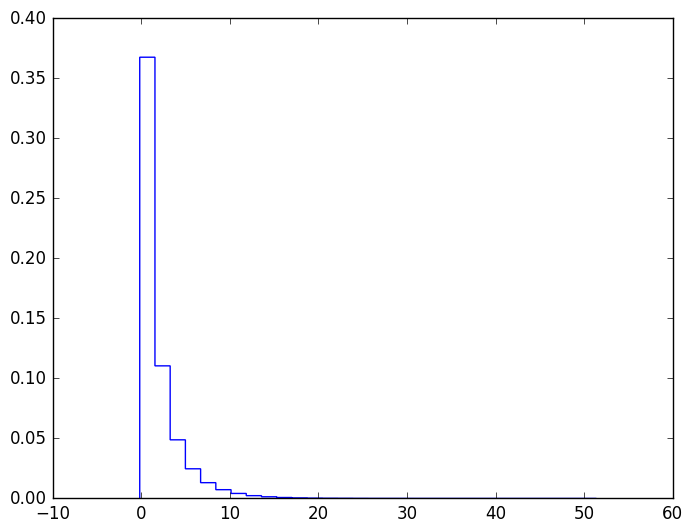

([0.367693,0.110496,0.0488541,0.0247122,0.0131442,0.00730484,0.00416837,0.00232165,0.00138519,0.000781061  …  2.32805e-6,1.74604e-6,5.82012e-7,1.74604e-6,5.82012e-7,5.82012e-7,5.82012e-7,0.0,0.0,5.82012e-7],[-0.171341,1.54684,3.26501,4.98319,6.70137,8.41954,10.1377,11.8559,13.5741,15.2922  …  35.9104,37.6285,39.3467,41.0649,42.7831,44.5013,46.2194,47.9376,49.6558,51.374],Any[PyObject <matplotlib.patches.Polygon object at 0x7fecf25e6fd0>])

In [10]:
plt[:hist](w_HH,bins = 30, normed = true, histtype="step")
#histogram(w_HH,nbins = 30, normed = true)

In [11]:
#deltaiHH = [HHsol[i][2]^2/2.  + HHsol[i][1]^2/2. + tauHH^2.*HHsol[i][3]^2/(2.*b) + tauHH^2.*HHsol[i][4]^2/(2.*b) + 1./b*HHsol[i][5] for i in 1:length(HHsol)] - I0;

In [12]:
#plot(deltaiHH)

### Nosé-Hoover

$$ f(\zeta) = \sqrt{\frac{\beta}{2\pi Q}} \exp\left(-\frac{\beta \zeta^2}{2 Q} \right) $$

\begin{eqnarray}
\dot{q} &=& p \\
\dot{p} &=& -\left(1 + \frac{t}{t_s} \right)^2 q - \frac{\zeta p}{Q} \\
\dot{\zeta} &=& p^2 - \frac{1}{\beta} \\
\dot{\nu} &=& \frac{\zeta}{Q}
\end{eqnarray}

In [13]:
function NoseHoover(t, u, du; ts=1., beta = b, Q = QNH) 
    du[1] = u[2]
    du[2] = -(1+t/ts)^2*u[1] - u[3]*u[2]/Q 
    #du[2] = -(1)^2*u[1] - u[3]*u[2]/Q  ##Isothermal dynamics (omega = 1)
    du[3] = u[2]^2 - 1/beta
    du[4] = u[3]/Q
end 

NoseHoover (generic function with 1 method)

In [14]:
function workNH()
    q0,p0 = rand(Normal(0.0, 1./sqrt(b)),2)
    zeta0 = rand(Normal(0.0, QNH/sqrt(b)))
    nu0 = 0.0
    u0NH = [q0,p0,zeta0,nu0]
    I0 = q0^2/2. + p0^2./2. + zeta0^2./(2*QNH)
    tspan = (0.0,1.0)
    probNH = ODEProblem(NoseHoover,u0NH,tspan)
    solNH = solve(probNH);
    NHsol = solNH.u;
    qf, pf, zetaf, nuf = NHsol[end];
    If = 4.*qf^2/2. + pf^2./2. + zetaf^2./(2*QNH) 
    return If - I0 + 1./b*nuf
end

workNH (generic function with 1 method)

In [15]:
workNH()

3.4774815584371432

In [16]:
#Ns = 10^5
w_NH = zeros(Ns);
for i in 1:Ns
    w_NH[i] = workNH()
end

In [17]:
deltaF_NH = -1/b.*log(mean(exp(-b*w_NH)))  ##Theoretical = 1.0397

1.0395398268264702

In [18]:
mean(w_NH)

1.8558898478955903

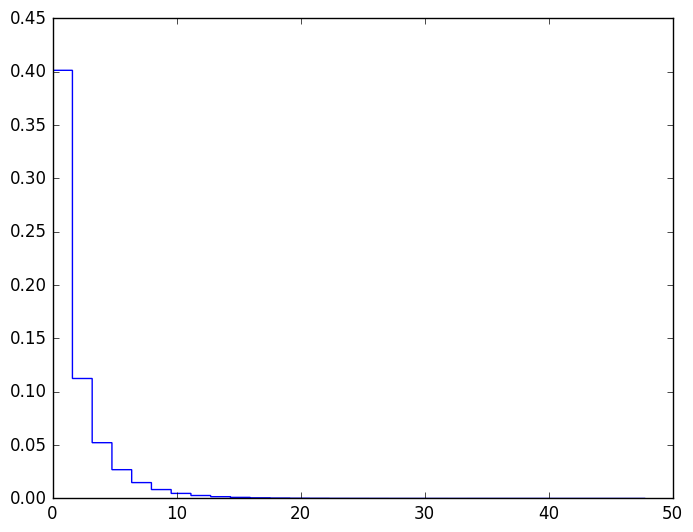

([0.401382,0.112456,0.052273,0.0269678,0.0148595,0.00832604,0.00472025,0.00274751,0.00164687,0.000998296  …  1.25572e-6,5.65073e-6,1.88358e-6,6.27859e-7,0.0,0.0,0.0,0.0,0.0,6.27859e-7],[1.55166e-8,1.59271,3.18543,4.77814,6.37086,7.96357,9.55628,11.149,12.7417,14.3344  …  33.447,35.0397,36.6324,38.2251,39.8178,41.4106,43.0033,44.596,46.1887,47.7814],Any[PyObject <matplotlib.patches.Polygon object at 0x7fecf24119d0>])

In [19]:
plt[:hist](w_NH,bins = 30, normed = true, histtype="step")
#histogram(w_NH,nbins = 30, normed = true)

In [20]:
#deltaiNH = [NHsol[i][2]^2/2.  + NHsol[i][1]^2/2. + NHsol[i][3]^2/(2.*QNH)  + 1./b*NHsol[i][4] for i in 1:length(solNH.u)] - I0;

### Logistic thermostat

\begin{eqnarray}
\dot{q} &=& p \\
\dot{p} &=& -\left(1 + \frac{t}{t_s} \right)^2 q - \frac{\tanh\left(\frac{\zeta}{2Q} \right)p}{\beta Q} \\
\dot{\zeta} &=& p^2 - \frac{1}{\beta} \\
\dot{\nu} &=& \frac{\tanh\left(\frac{\zeta}{2Q} \right)}{\beta Q}
\end{eqnarray}

In [21]:
function LogisticTh(t, u, du; ts=1., beta = b, Q = Qlog) 
    du[1] = u[2]
    du[2] = -(1+t/ts)^2*u[1] - tanh(u[3]/(2*Q))*u[2]/(beta*Q)
    #du[2] = -(1)^2*u[1] - u[3]*u[2]/Q  ##Isothermal dynamics (omega = 1)
    du[3] = u[2]^2 - 1/beta
    du[4] = tanh(u[3]/(2*Q))*u[2]/(beta*Q)
end 

LogisticTh (generic function with 1 method)

In [22]:
function worklog()
    q0,p0 = rand(Normal(0.0, 1./sqrt(b)),2)
    z0 = rand(Logistic(0.0,QLog))
    nu0 = 0.0
    u0NH = [q0,p0,z0,nu0]
    I0 = q0^2/2. + p0^2./2. - log(exp(z0/QLog)/(QLog*(1+exp(z0/QLog))^2.))/b
    tspan = (0.0,1.0)
    probNH = ODEProblem(NoseHoover,u0NH,tspan)
    solNH = solve(probNH);
    NHsol = solNH.u;
    qf, pf, zf, nuf = NHsol[end];
    If = 4.*qf^2/2. + pf^2./2. - log(exp(zf/QLog)/(QLog*(1+exp(zf/QLog))^2.))/b
    return If - I0 + 1./b*nuf
end

worklog (generic function with 1 method)

In [23]:
worklog()

0.9927802028554535

In [24]:
#Ns = 10^5
w_log = zeros(Ns);
for i in 1:Ns
    w_log[i] = worklog()
end

In [25]:
deltaF_log = -1/b.*log(mean(exp(-b*w_log)))  ##Theoretical = 1.0397

1.0392473797553006

In [26]:
mean(w_log)

2.075584527980074

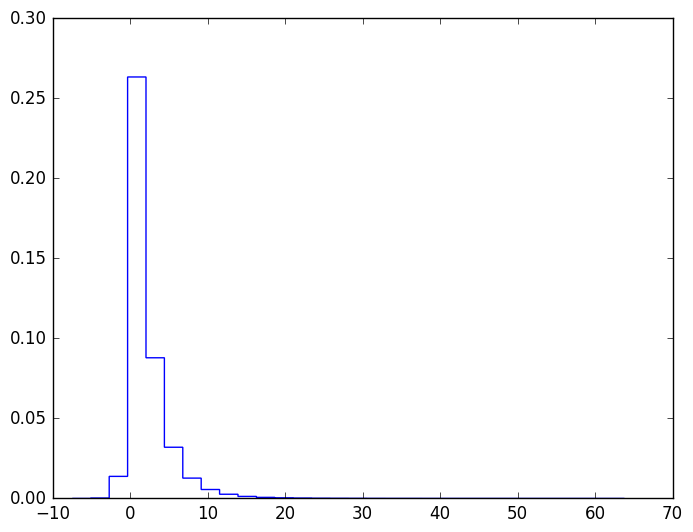

([5.89792e-6,0.000257823,0.0137931,0.263421,0.0879178,0.0320017,0.0127071,0.00559081,0.002625,0.00126679  …  7.16176e-6,1.68512e-6,1.68512e-6,2.1064e-6,8.4256e-7,4.2128e-7,4.2128e-7,0.0,8.4256e-7,4.2128e-7],[-7.45418,-5.08046,-2.70674,-0.333024,2.04069,4.41441,6.78813,9.16185,11.5356,13.9093  …  42.3939,44.7676,47.1413,49.5151,51.8888,54.2625,56.6362,59.0099,61.3837,63.7574],Any[PyObject <matplotlib.patches.Polygon object at 0x7fecf1ee3310>])

In [27]:
plt[:hist](w_log,bins = 30, normed = true, histtype="step")
#histogram(w_log,nbins = 30, normed = true)

## Comparison

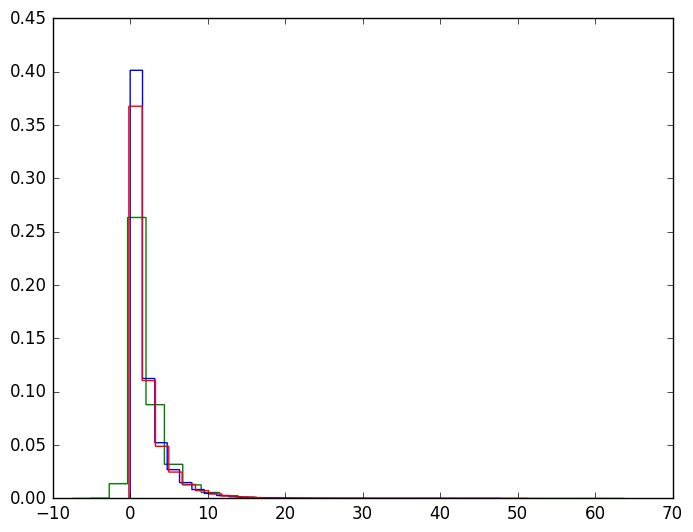

([0.367693,0.110496,0.0488541,0.0247122,0.0131442,0.00730484,0.00416837,0.00232165,0.00138519,0.000781061  …  2.32805e-6,1.74604e-6,5.82012e-7,1.74604e-6,5.82012e-7,5.82012e-7,5.82012e-7,0.0,0.0,5.82012e-7],[-0.171341,1.54684,3.26501,4.98319,6.70137,8.41954,10.1377,11.8559,13.5741,15.2922  …  35.9104,37.6285,39.3467,41.0649,42.7831,44.5013,46.2194,47.9376,49.6558,51.374],Any[PyObject <matplotlib.patches.Polygon object at 0x7fecef972e50>])

In [29]:
plt[:hist](w_log,bins = 30, normed = true, histtype="step", color="g")
plt[:hist](w_NH,bins = 30, normed = true, histtype="step", color = "blue")
plt[:hist](w_HH,bins = 30, normed = true, histtype="step", color = "red")

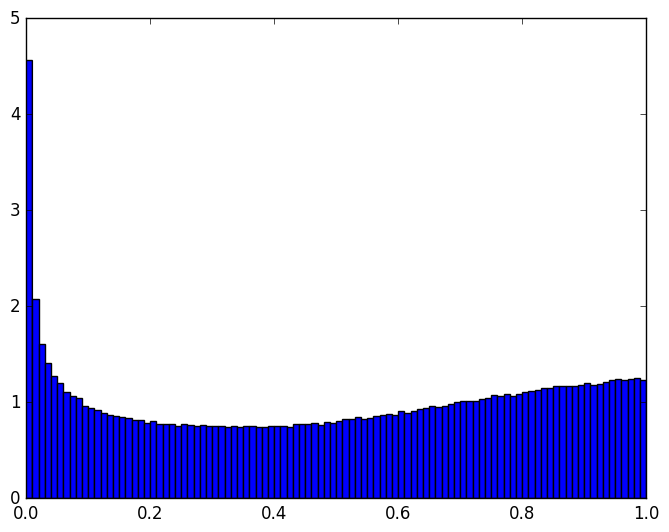

([4.5619,2.0786,1.6042,1.408,1.2792,1.203,1.1114,1.0672,1.0475,0.9668  …  1.2043,1.1834,1.1913,1.21,1.229,1.2423,1.2319,1.2424,1.2538,1.2335],[1.46509e-14,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0],Any[PyObject <matplotlib.patches.Rectangle object at 0x7feceb7a0810>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb7a0e90>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb7aa550>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb7aabd0>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb737290>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb737910>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb737f90>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb743650>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb743cd0>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb751390>  …  PyObject <matplotlib.patches.Rectangle object at 0x7feceb580890>,PyObject <matplotlib.pa

In [44]:
plt[:hist](exp(-b*w_NH), bins = 100, normed = true)
#plt[:hist](exp(-b*w_NH),bins = 30, normed = true, histtype="step", color = "blue")
#plt[:hist](exp(-b*w_HH),bins = 30, normed = true, histtype="step", color = "red")

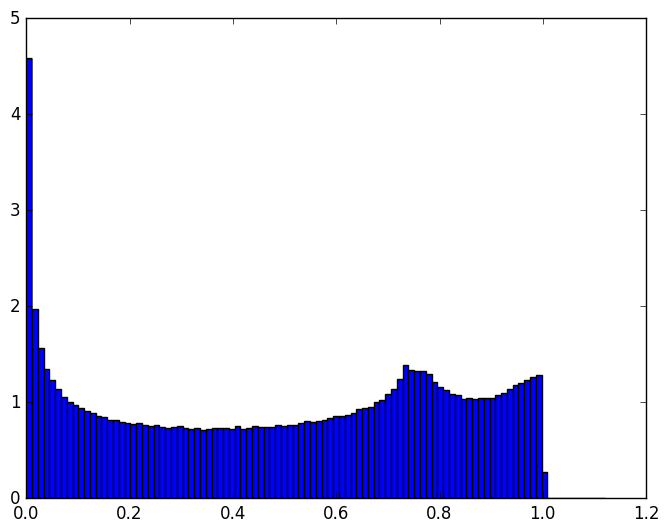

([4.58213,1.97305,1.56368,1.34406,1.22952,1.13951,1.05985,1.00276,0.969575,0.93978  …  0.0,0.000446028,0.000178411,8.92055e-5,0.0,0.000178411,0.000178411,8.92055e-5,0.0,8.92055e-5],[1.33572e-15,0.0112101,0.0224201,0.0336302,0.0448403,0.0560503,0.0672604,0.0784705,0.0896805,0.100891  …  1.02012,1.03133,1.04254,1.05375,1.06496,1.07617,1.08738,1.09859,1.1098,1.12101],Any[PyObject <matplotlib.patches.Rectangle object at 0x7feceb4f3ad0>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb4f3fd0>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb47f810>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb47fe90>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb48e550>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb48ebd0>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb49a290>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb49a910>,PyObject <matplotlib.patches.Rectangle object at 0x7feceb49af90>,PyObject <matplotlib.patches.Rectangle objec

In [45]:
plt[:hist](exp(-b*w_HH), bins = 100, normed = true)

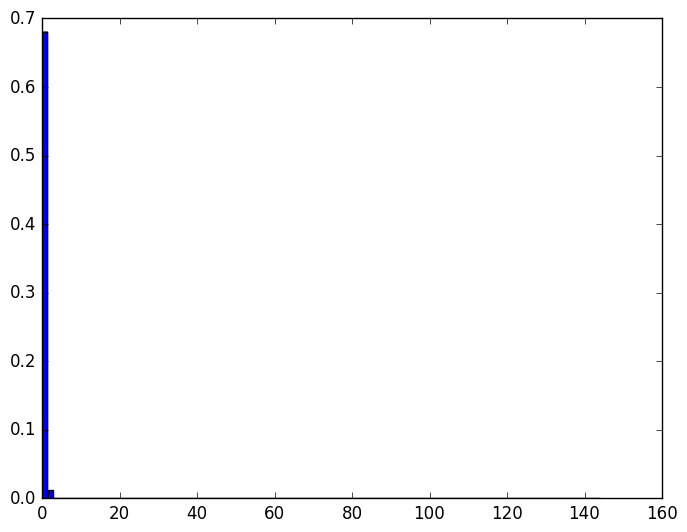

([0.680088,0.0123086,0.00136369,0.000441826,0.000201462,0.00010212,5.14074e-5,3.05666e-5,2.57037e-5,1.11151e-5  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.94695e-7],[3.47017e-19,1.43948,2.87896,4.31844,5.75792,7.1974,8.63688,10.0764,11.5158,12.9553  …  130.993,132.432,133.872,135.311,136.751,138.19,139.63,141.069,142.509,143.948],Any[PyObject <matplotlib.patches.Rectangle object at 0x7feceac18410>,PyObject <matplotlib.patches.Rectangle object at 0x7feceac18a90>,PyObject <matplotlib.patches.Rectangle object at 0x7feceac18f90>,PyObject <matplotlib.patches.Rectangle object at 0x7feceac247d0>,PyObject <matplotlib.patches.Rectangle object at 0x7feceac24e50>,PyObject <matplotlib.patches.Rectangle object at 0x7feceac32510>,PyObject <matplotlib.patches.Rectangle object at 0x7feceac32b90>,PyObject <matplotlib.patches.Rectangle object at 0x7feceabbf250>,PyObject <matplotlib.patches.Rectangle object at 0x7feceabbf8d0>,PyObject <matplotlib.patches.Rectangle object at 0x7feceabbff50>  …  PyObject <ma

In [48]:
plt[:hist](exp(-b*w_log), bins = 100, normed = true)

In [57]:
maximum(exp(-b*w_log)), minimum(exp(-b*w_log))

(143.94806288070697,3.47017343238189e-19)

In [58]:
maximum(exp(-b*w_HH)), minimum(exp(-b*w_HH))

(1.1210066892773742,1.3357207082506333e-15)

In [52]:
mean(exp(-b*w_log)), std(exp(-b*w_log))

(0.5001578219307276,0.5414946529809352)

In [53]:
mean(exp(-b*w_HH)), std(exp(-b*w_HH))

(0.5000309324594192,0.3182104643635226)

In [54]:
mean(exp(-b*w_NH)), std(exp(-b*w_NH))

(0.5000603183091551,0.31818913263197623)